In [103]:
import pyaudio
import numpy as np
import threading

class PlaySound(threading.Thread) :
  """
  Plays sine wave at certain frequency.

  """

  def __init__(sinewave, freq=10000, length=1., volume=0.5):
    threading.Thread.__init__(sinewave)
    sinewave.p = pyaudio.PyAudio()

    sinewave.volume = volume    
    sinewave.fs = 44100          
    sinewave.duration = length   
    sinewave.f = freq           

  def run(sinewave) :

    # generate samples, note conversion to float32 array
    sinewave.samples = (np.sin(2*np.pi*np.arange(sinewave.fs*sinewave.duration)*sinewave.f/sinewave.fs)).astype(np.float32)

    # for paFloat32 sample values must be in range [-1.0, 1.0]
    sinewave.stream = sinewave.p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=sinewave.fs,
                    output=True)

    # play. May repeat with different volume values (if done interactively) 
    sinewave.stream.write(sinewave.volume*sinewave.samples)

    sinewave.stream.stop_stream()
    sinewave.stream.close()

    sinewave.p.terminate()



In [104]:
golden = (1 + 5 ** 0.5) / 2

In [105]:
s = PlaySound(freq=10000, length=10., volume=0.5)
s.start()

In [106]:
s = PlaySound(freq=10000*golden, length=10., volume=0.5)
s.start()

In [107]:
s = PlaySound(freq=10000/np.e, length=10., volume=0.5)
s.start()

In [108]:
from scipy.io import wavfile

In [109]:
#Sound Recorder
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [110]:
samplerate, data = wavfile.read("output.wav")
print(f"number of channels = {data.shape[1]}")

number of channels = 2


In [111]:
print(samplerate)

44100


In [113]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 4.992290249433107s


In [114]:
%matplotlib inline

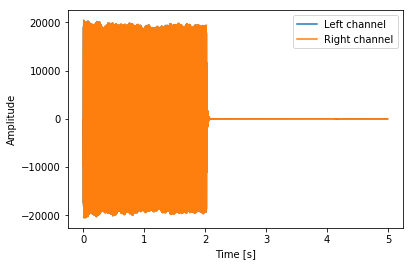

In [115]:
#Graphs the recorded audio
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [116]:
data.shape

(220160, 2)

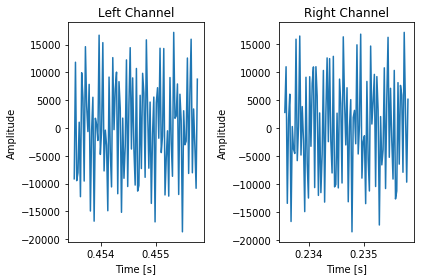

In [117]:
#Checks if above signal is sinewave
plt.subplot(1, 2, 1)
plt.plot(time[20000:20100],data[20000:20100,0], label="Left channel")
plt.title("Left Channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(time[10300:10400],data[10300:10400,1], label="Right channel")
plt.title("Right Channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [118]:
header = "Time, Left, Right\n"


np.savetxt('filename.txt', [time, data[:, 0],data[:, 1]], header=header)



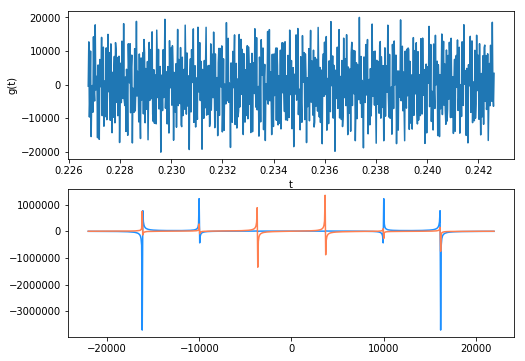

In [119]:
from scipy import fftpack 
g=data[10000:10700,0]
t=time[10000:10700]
dt = 1/samplerate # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')


Comparison Graphs 